In [1]:
# RUN THIS CELL
import itertools
import math

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

%matplotlib inline

## reading data

In [3]:
df = pd.read_csv('nyc_demo_data.csv', index_col=0)
df.head()

,FIPS,"Housing Median Gross Rent, 2021 [Estimated]","Median Household Income, 2021 [Estimated]","# Value [B25075] | Owner-occupied housing units, 2019","% Educational Attainment | Some college, 2021 [Estimated]","% Employment Status | In labor force, 2021 [Estimated]","# Household Size | Households, 2021 [Estimated]","% Race | White alone, 2021 [Estimated]","% Race | Asian alone, 2021 [Estimated]","% Race | Black or African American alone, 2021 [Estimated]","% Race | American Indian and Alaska Native alone, 2021 [Estimated]","% Family Type | Married-couple family, 2021 [Estimated]","% Family Type | Married-couple With own children of the householder under 18 years, 2021 [Estimated]"
Name,,,,,,,,,,,,,
"10001, New York, NY",10001,2126.073,91733.852,3285,6.759,72.077,13548,66.371,25.880,2.991,0.088,72.097,21.254
"10002, New York, NY",10002,992.176,37159.062,4526,8.623,52.306,33601,33.820,40.805,8.548,1.534,60.215,11.141
"10003, New York, NY",10003,2378.657,118801.115,8445,5.831,65.591,25113,74.291,14.513,6.459,0.153,89.489,22.471
"10004, New York, NY",10004,3371.607,187819.598,673,2.224,80.917,1827,55.517,32.419,4.956,0.000,92.944,29.217
"10005, New York, NY",10005,3385.291,195127.366,919,1.147,92.859,4425,74.163,16.873,0.955,0.000,89.216,39.093


In [5]:
df_dog_breed_zip = pd.read_csv('dog_per_zip.csv', index_col=0)
len(df_dog_breed_zip)

511

In [6]:
df_park_ori=pd.read_csv('OpenData_ParksProperties.csv')
df_park_ori

,the_geom,GISPROPNUM,OBJECTID,OMPPROPID,DEPARTMENT,PERMITDIST,PERMITPARE,PARENTID,LOCATION,COMMUNITYB,COUNCILDIS,PRECINCT,ZIPCODE,BOROUGH,ACRES,RETIRED,EAPPLY,PIP_RATABL,GISOBJID,CLASS,COMMISSION,ACQUISITIO,ADDRESS,JURISDICTI,MAPPED,NAME311,PERMIT,SIGNNAME,SUBCATEGOR,TYPECATEGO,URL,WATERFRONT,NYS_ASSEMB,NYS_SENATE,US_CONGRES,GlobalID
0,"MULTIPOLYGON (((-74.14227319856263 40.54219614399445, -74.14218172142256 40.54213060160079, -74....",R145,6367,R145,R-03,R-03,R-03,R-03,"Nelson Ave., Tennyson Dr. and Bulkhead Line",503,51,122.0,10308,R,20.907,False,Seaside Wildlife Nature Park,Yes,100005021,PARK,2.010e+13,1.999e+13,NaN,DPR,True,Seaside Wildlife Nature Park,Y,Seaside Wildlife Nature Park,Neighborhood Park,Neighborhood Park,http://www.nycgovparks.org/parks/R145/,Yes,64,24,11,{EC14E5C9-9687-49BC-9A7A-77F977DC0448}
1,"MULTIPOLYGON (((-73.90748556731788 40.75708917875267, -73.90767966215755 40.757071748493715, -73...",Q355,5916,Q355,Q-01,Q-01,Q-01,Q-01,"31 Ave., 51 St., 54 St.",401,22,114.0,11377,Q,0.061,False,Strippoli Square,Yes,100000375,PARK,2.009e+13,1.953e+13,NaN,DPR,True,Strippoli Square,Y,Strippoli Square,Sitting Area/Triangle/Mall,Triangle/Plaza,http://www.nycgovparks.org/parks/Q355/,No,30,12,14,{62700020-4840-4F4A-A15A-7D65B9A6A794}
2,"MULTIPOLYGON (((-74.00468042094083 40.6558401856359, -74.00492023725671 40.655613945962095, -74....",B210B,5465,B210B,B-07,B-07,B-07,B-07,3 Ave. bet. 35 St. and 34 St.,307,38,72.0,11232,B,1.130,False,D'Eemic Playground,Yes,100004733,PARK,2.010e+13,1.940e+13,150 34 STREET,DPR,True,D'Emic Playground,Y,D'Emic Playground,Neighborhood Plgd,Playground,http://www.nycgovparks.org/parks/B210B/,No,51,25,7,{BFD91324-49C1-46B5-B3E9-E43A989DC40B}
3,"MULTIPOLYGON (((-73.85639866166588 40.80924557141121, -73.85675812726971 40.809200179593915, -73...",X262,4857,X262,X-09,X-09,X-09,X-09,Bolton Ave. bet. O'Brien Ave. and G St.,209,18,43.0,10473,X,2.160,False,Harding Park,Yes,100004033,PARK,2.010e+13,2.010e+13,201/125 BOLTON AVENUE,DPR,False,Harding Park,Y,Harding Park,Neighborhood Plgd,Neighborhood Park,http://www.nycgovparks.org/parks/X262/,No,85,34,15,{BDFFC8B5-573A-4771-8E51-601D03705C78}
4,"MULTIPOLYGON (((-73.85415528855233 40.901874458858735, -73.85454563388666 40.90138836822279, -73...",X188,6621,X188,X-12,X-12,X-12,X-12,Matilda Ave. to Carpenter Ave. bet. E. 239 St. and E. 240 St.,212,11,47.0,10470,X,1.104,False,Wakefield Playground,Yes,100004702,PARK,2.010e+13,1.955e+13,4522 CARPENTER AVENUE,DPR/DOE,False,Wakefield Playground,Y,Wakefield Playground,JOP,Jointly Operated Playground,http://www.nycgovparks.org/parks/X188/,No,81,36,16,{E33C24CE-ACEB-4018-BAF0-3CE447C8A2AF}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,"MULTIPOLYGON (((-73.95042032246141 40.807740699792056, -73.9506046803461 40.80748693118513, -73....",M351,87744,M351,M-10,M-10,M-10,M-10,W. 122 St. bet. Fred Douglass Blvd. and Adam Clayton Powell Blvd.,110,9,28.0,10027,M,0.117,False,Joseph Daniel Wilson Garden,No,100004815,PARK,2.010e+13,2.002e+13,219 - 225 WEST 122 STREET,DPR,False,Joseph Daniel Wilson Garden,N,Joseph Daniel Wilson Garden,Greenthumb,Garden,http://www.nycgovparks.org/parks/M351/,No,70,30,13,{2C315CFE-7DD4-499A-A7EC-94C71E8277CD}
2011,"MULTIPOLYGON (((-73.99773025583967 40.729109989687466, -73.99781169158223 40.72901399614523, -73...",M395,6301,M395,M-02,M-02,M-02,M-02,La Guardia Pl. bet. W. 3 St. and Bleecker St.,102,1,6.0,10012,M,0.545,False,Adrienne's Playground,Yes,100008287,PARK,NaN,2.015e+13,NaN,DPR,True,Fiorello La Guardia Park,NaN,Fiorello La Guardia Park,Neighborhood Plgd,Neighborhood Park,NaN,No,66,27,10,{14CA2496-AE32-4DB4-B89B-789B150B99B8}
2012,"MULTIPOLYGON (((-73.92392805010722 40.73250227301633, -73.92351933135797 40.73241316711989, -73....",Q360A,5693,Q360A,Q-02,Q-02,Q-02,Q-02,53 Ave.bet. 43 St. and 44 St.,402,30,108.0,11378,Q,0.006,False,Strip,No,100000456,PARK,2.009e+13,1.968e+13,NaN,DPR,True,Park,N

In [7]:
# df_park.columns.tolist()
df_park=df_park_ori[['ZIPCODE','ACRES']]

In [8]:
df_park

,ZIPCODE,ACRES
0,10308,20.907
1,11377,0.061
2,11232,1.130
3,10473,2.160
4,10470,1.104
...,...,...
2010,10027,0.117
2011,10012,0.545
2012,11378,0.006
2013,11206,0.064


In [9]:
df_park_split=(df_park.set_index(['ACRES'])
   .apply(lambda x: x.str.split(',').explode())
   .reset_index()) 
df_park_split

,ACRES,ZIPCODE
0,20.907,10308
1,0.061,11377
2,1.130,11232
3,2.160,10473
4,1.104,10470
...,...,...
2253,0.117,10027
2254,0.545,10012
2255,0.006,11378
2256,0.064,11206


In [10]:
df_park_split.columns=['ACRES','ZipCode']

In [11]:
x=df_park_split.groupby(['ZipCode'])['ACRES'].sum()
df_park_zip=pd.DataFrame(x)

In [12]:
df_park_zipcode_count = df_park_split.copy()
df_park_count_zip = pd.DataFrame(df_park_zipcode_count[['ZipCode']].value_counts())

df_park_count_zip.reset_index(inplace=True)

In [14]:
df_park_count_zip=df_park_count_zip.set_index('ZipCode')

In [18]:
df_park_info_zip=df_park_count_zip.join(df_park_zip)
df_park_info_zip

,0,ACRES
ZipCode,,
11207,59,274.084
11211,51,102.971
11201,42,117.388
10009,42,20.813
11212,37,34.489
11233,36,26.016
11206,34,28.274
10457,33,76.278
10452,32,38.728


In [ ]:
df_park_info_zip.columns=['park_counts','park_acres']


In [20]:
x_1=df_park_info_zip.groupby(['ZipCode'])['park_acres'].sum()

KeyError: 'Column not found: park_acres'

In [ ]:
y_1=df_park_info_zip.groupby(['ZipCode'])['park_counts'].sum()

In [ ]:
df_park_zip_1=pd.DataFrame(x_1)
df_park_zip_2=pd.DataFrame(y_1)
df_park_zip_new=df_park_zip_2.join(df_park_zip_1)
# df_park_count_zip.columns=['ZipCode', 'counts']
df_park_zip_new

In [ ]:
df_park_info_zip=pd.read_csv('park_per_zip.csv')

In [ ]:
# df_park_info_zip
df_park_info_zip=df_park_info_zip.set_index('ZipCode')

In [ ]:
dog_demo_dec07=pd.read_csv('dog_demo_dec07.csv')

In [ ]:
dog_demo_dec07=dog_demo_dec07.set_index('ZipCode')

In [ ]:
dog_demo_dec09=dog_demo_dec07[['BreedName','sex','AnimalBirthYear','height','weight']]

In [ ]:
dog_demo_dec09

In [ ]:
df_total = pd.read_csv('total_imputed.csv', index_col=0)
df_total

In [ ]:
df_total['ZipCode']=df_total['ZipCode'].astype(int)

In [ ]:
df_total=df_total.set_index('ZipCode')

In [ ]:
df_dog_per_zip=pd.read_csv('dog_per_zip.csv')
df_dog_per_zip['ZipCode']=df_dog_per_zip['ZipCode'].astype(int)
df_dog_per_zip=df_dog_per_zip.set_index('ZipCode')
len(df_dog_per_zip)

In [ ]:
df_dog_per_zip=df_dog_per_zip.drop('counts',axis=1)

In [ ]:
df_total_demo_dog_counts=dog_demo_dec09.join(df_total)

In [ ]:
df_total_demo_dog_counts=df_total_demo_dog_counts.set_index('ZipCode')

In [ ]:
total_dog_dec09=df_total_demo_dog_counts.join(df_park_info_zip)

In [ ]:
df_total_demo_dog_park_counts=df_total_demo_dog_counts.join(df_park_info_zip)

## impute mean

In [ ]:
df_dog['height'] = df_dog['height'].fillna(df_dog['height'].dropna().mean())


In [ ]:
df_dog['weight'] = df_dog['weight'].fillna(df_dog['weight'].dropna().mean())


In [27]:
df_dog.columns

Index(['BreedName', 'AnimalName', 'AnimalGender', 'AnimalBirthYear', 'ZipCode',
       'LicenseIssuedDate', 'LicenseExpiredDate', 'Extract Year', 'Unnamed: 0',
       'url', 'height', 'weight', 'longivity'],
      dtype='object')

In [28]:
df_dog['sex']=(df_dog['AnimalGender']=='M').astype(int)

In [29]:
# df_dog

In [30]:
wanted_feature_dog_list=['BreedName', 'sex', 'AnimalBirthYear', 'ZipCode','height', 'weight']

In [31]:
df_dog=df_dog[wanted_feature_dog_list]

In [32]:
df_dog.sort_values('ZipCode')

,BreedName,sex,AnimalBirthYear,ZipCode,height,weight
0,terrier crossbreed,1,2010,0,NaN,NaN
1,bichon frise,1,2021,687,11.0,12.0
2,poodle crossbreed,1,2018,923,NaN,NaN
3,maltese,1,2019,1001,10.0,7.0
4,"poodle, miniature",1,2019,1002,NaN,NaN
...,...,...,...,...,...,...
213069,jack russell terrier,0,2008,98072,15.0,17.0
213070,american pit bull mix / pit bull mix,0,2007,98363,NaN,NaN
213071,american pit bull mix / pit bull mix,1,2014,98363,NaN,NaN
213072,chihuahua crossbreed,1,2016,99202,NaN,NaN


In [ ]:
df_height_mean=pd.DataFrame(df_dog.groupby(['ZipCode'])['height'].mean())
df_weight_mean=pd.DataFrame(df_dog.groupby(['ZipCode'])['weight'].mean())

In [ ]:
df_average_w_h_per_zip=df_weight_mean.join(df_height_mean)
df_average_w_h_per_zip

In [ ]:
# df_average_w_h_per_zip.to_csv('average_w_h_per_zip.csv')

In [ ]:
df_total=df_total.set_index('ZipCode')

In [ ]:
df_park_info_zip

In [ ]:
df_imputed_a=df_total.join(df_average_w_h_per_zip)
# df_imputed_all=df_imputed_a.join(df_park_info_zip)
# df_imputed_all

## viz dog

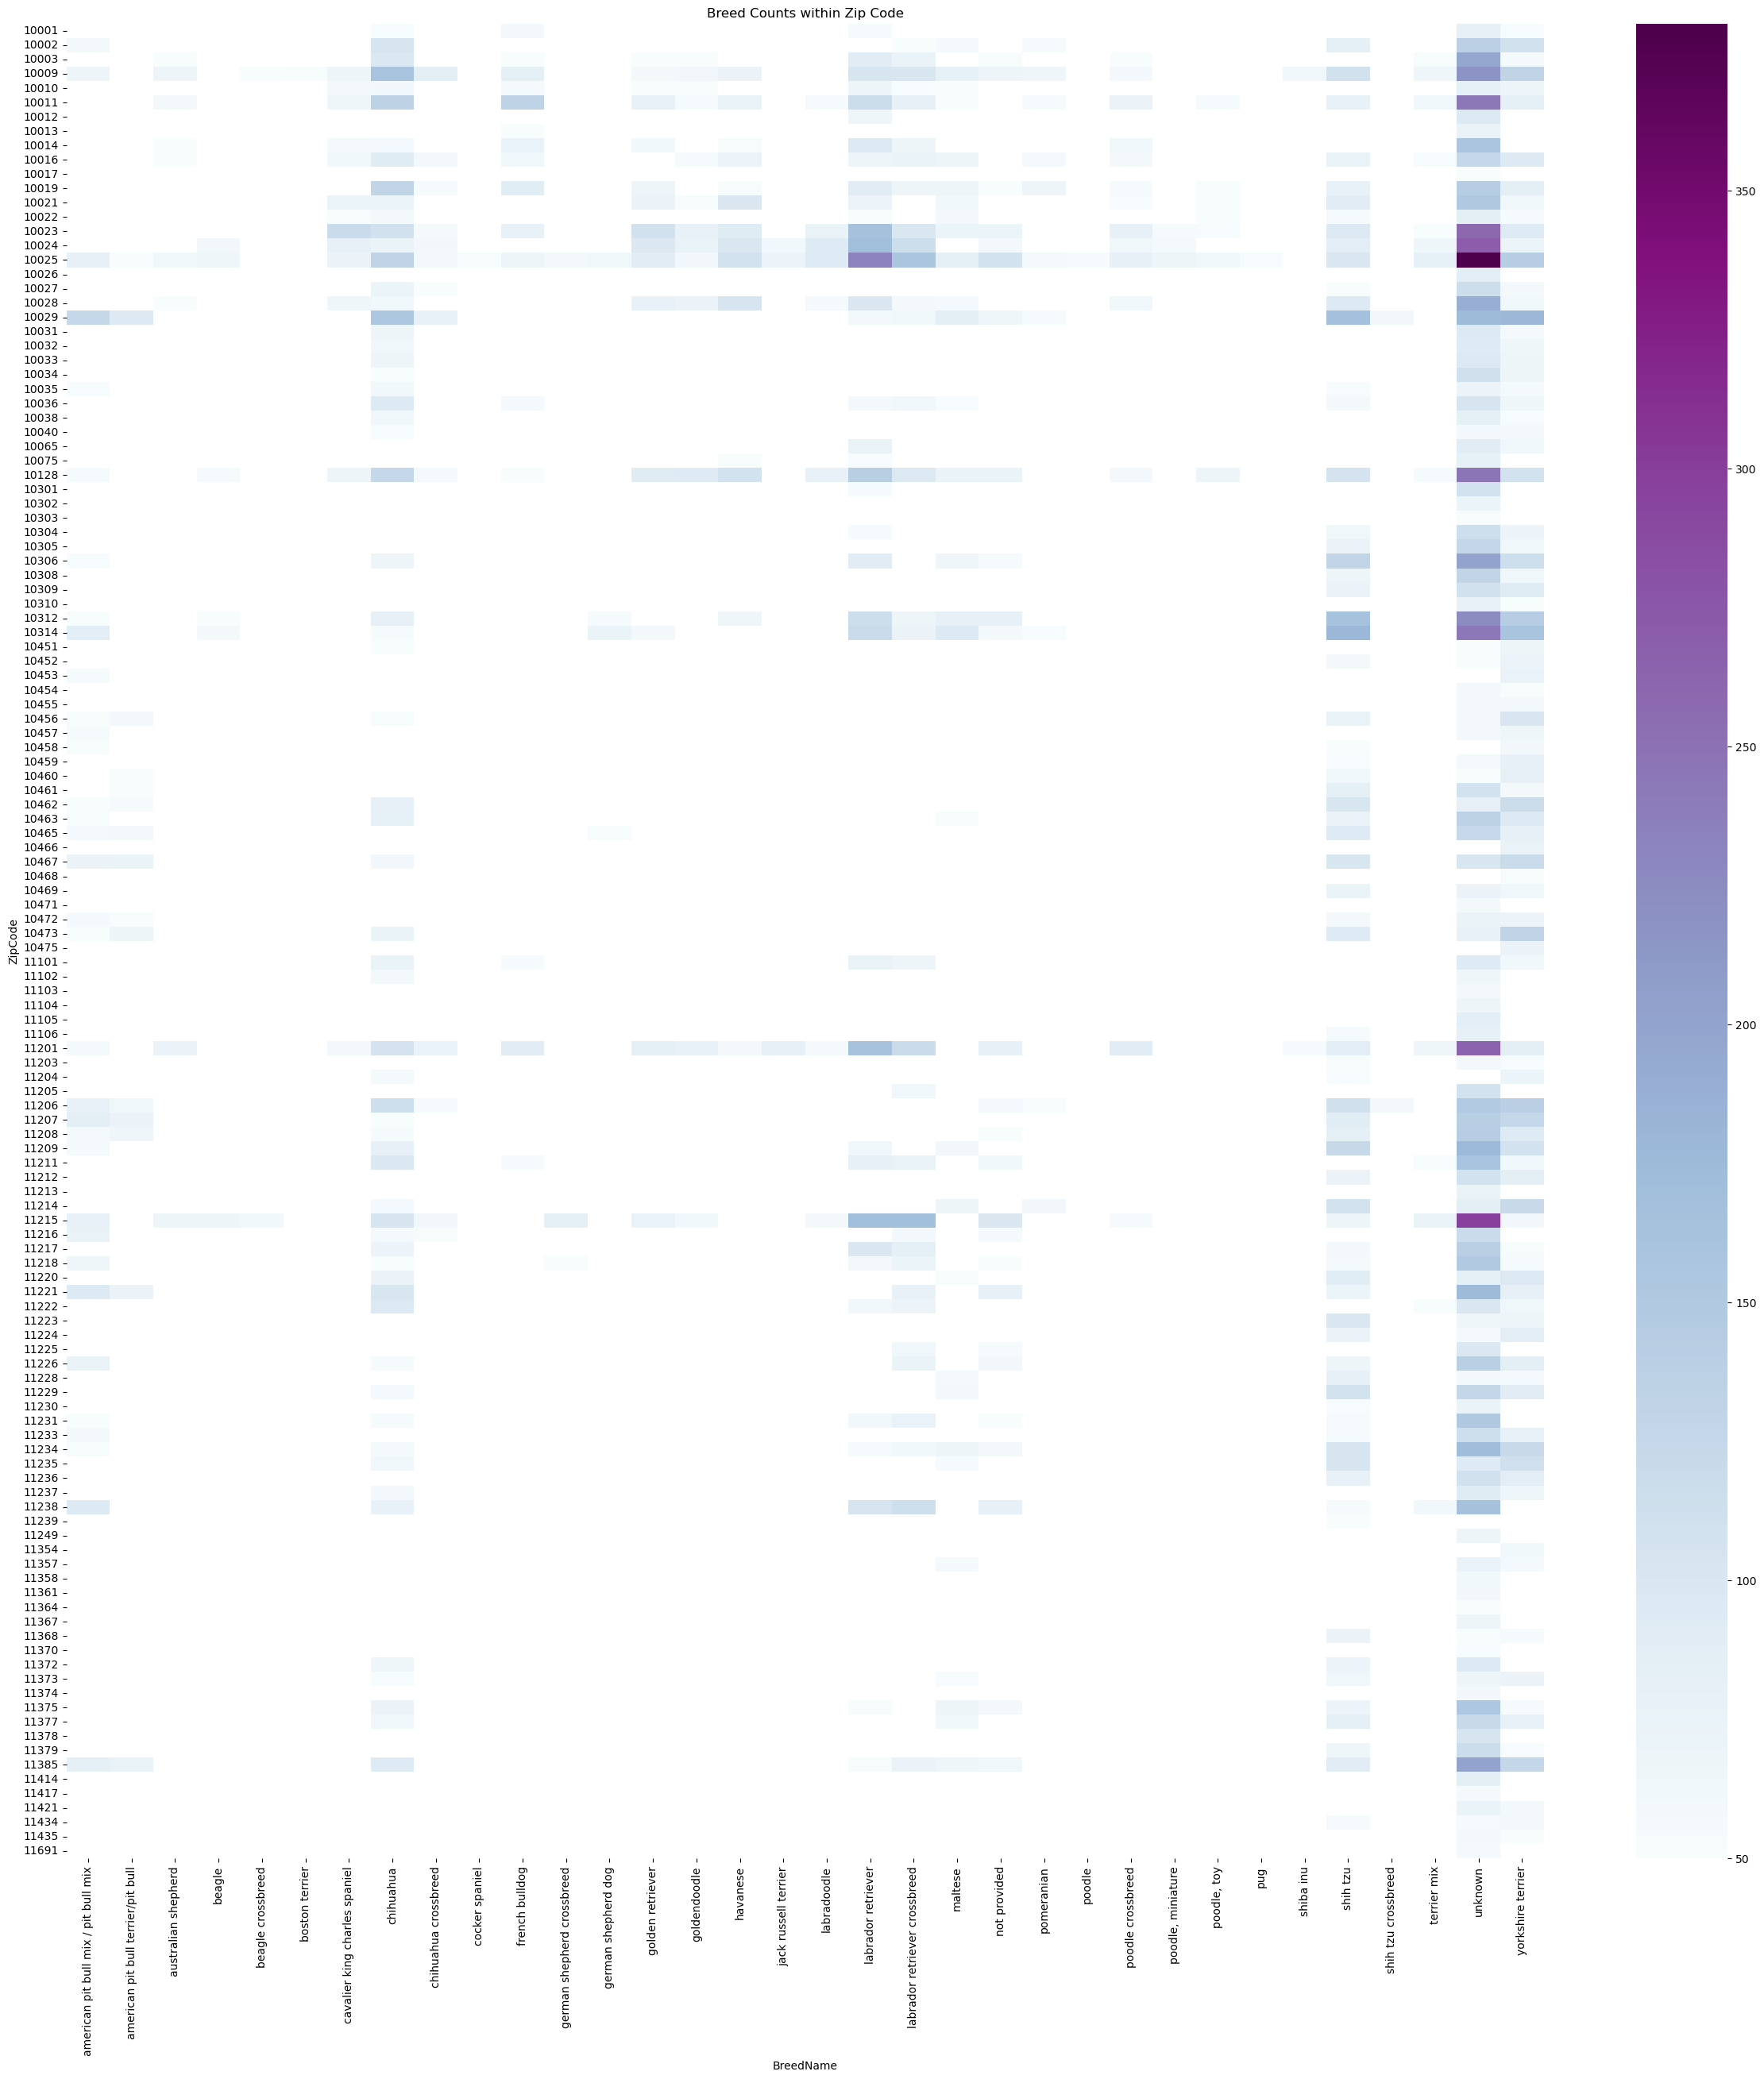

In [64]:
# count dog breed # in each ZipCode
df_dog = pd.read_csv('dog_info_dec_3.csv')

df_dog_zipcode_count = df_dog.copy()
zipcode_count = pd.DataFrame(df_dog_zipcode_count[['ZipCode','BreedName']].value_counts())
zipcode_count.reset_index(inplace=True)
zipcode_count.columns=['ZipCode','BreedName','counts']
df3 = pd.pivot_table(data=zipcode_count[zipcode_count['counts']>=50],
                    index='ZipCode',
                    values='counts',
                    columns='BreedName')
df3.head()

fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(df3,cmap="BuPu")
plt.title('Breed Counts within Zip Code')
results_path = 'results.png'
#print(results_path)
# plt.savefig(results_path)

In [65]:
# df3.to_csv('breed_count_zip_dec10.csv')

- from the graph above we can see there are several zipcodes have more labrador ....

## joining data
join data of dog with zipcode demographic info

In [ ]:
df_dog_join_demo=df_dog.join(df_total)
df_dog_join_demo=df_dog_join_demo.dropna()


In [ ]:
df_dog_join_demo.to_csv('dog_demo_dec07.csv')

In [ ]:
df_park_info_zip

In [ ]:
df_park_info_dog=df_dog.join(df_park_info_zip)

In [ ]:
corr = X.corr()
fig, ax = plt.subplots(figsize=(20, 10))

cmap = sns.diverging_palette(200, 20, as_cmap=True)
sns.heatmap(corr, vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
fig.savefig('correlation.png', dpi=300)

In [ ]:
# # sns.pairplot(df_plot).get_figure().savefig('income_f_age.png')
# sns_plot = sns.pairplot(X, height=5)
# plt.savefig('output.png')


In [ ]:
# corr = X.corr()
# fig, ax = plt.subplots(figsize=(20, 10))

# cmap = sns.diverging_palette(200, 20, as_cmap=True)
# sns.heatmap(corr, vmax=.3, center=0, cmap=cmap,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
# fig.savefig('correlation.png', dpi=300)

In [ ]:
plot_list=['rent','%25 to 44 years',
 '%45 to 54 years',
 '%\xa055 to 59 years',
 '%60 years and over',
 '%Female',
 '%$50,000 to $64,999',
 '%100 to 149 percent of the poverty level',
 '%Service occupations',
 '\xa0%Other services (except public administration)',
 '%Private wage and salary workers',
 '%5:00 a.m. to 5:29 a.m.',
 '%5:30 a.m. to 5:59 a.m.',
 '%6:00 a.m. to 6:29 a.m.',
 '%6:30 a.m. to 6:59 a.m.',
 '\xa0%45 to 59 minutes',
 'Workers 16 years and over in households',
 '\xa0%1 vehicle available',
 '%\xa02 vehicles available',
 '\xa0%Vehicles available',
 'income',
 '%race_blackAfiranAmerican']